# Dog Data Analysis and Breed Grouping

## Overview
- **I have made observations below and you will see them underneath cells that have a header called Observations**
- **The overall 'doggyness' question I try to answer is how many breeds of dogs could there be in this dataset?**

## Information related to the data

In [ ]:
# order_seen (int) - the order in which the dogs were seen
# name (string) - the dog’s name
# age (integer) - the age in years
# num_barks (int) - the number of times the dog barked while being seen 
# length (cm) - the length from nose to hip
# height (cm) - from floor to back
# leg_length (cm) - length of legs
# tail_length (cm) - length of tail
# waggy_tail (boolean) - whether the dog had a waggy tail 
# weight (kg) - weight in kilograms
# long_haired (int) - Binary response: 0 means short haired, 1 means
# num_barks (int) - Number of times the dog barked at the vet while being seen
# scary (0/1) - Binary response: 0 means not scary, 1 is scary according to the vet
# one_direction_or_beethoven (string) - whether the dog prefers to listen to One Direction or Beethoven, according to the vet
# notes (string) - any notes from the vet

## Importing Packages and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
doggy_data = pd.read_csv('doggy_data.csv', index_col=0)

## Data Cleaning and EDA

In [3]:
# Checking to see information related to the data loaded
doggy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 14 columns):
order_seen                    200 non-null int64
name                          200 non-null object
age                           200 non-null int64
num_barks                     200 non-null int64
waggy_tail                    200 non-null bool
length                        195 non-null float64
height                        194 non-null float64
leg_length                    199 non-null float64
tail_length                   195 non-null float64
weight                        197 non-null float64
long_haired                   200 non-null int64
scary                         200 non-null int64
one_direction_or_beethoven    200 non-null object
notes                         12 non-null object
dtypes: bool(1), float64(5), int64(5), object(3)
memory usage: 22.1+ KB


#### Comments
- length, height, leg_length, tail_length, weight (numeric columns) have null values that we need to fill.
- don't want to drop any data so we can fill with mean.

In [4]:
doggy_data = doggy_data.fillna(doggy_data.mean())

In [5]:
# Checking data to make sure no numeric columns have null values now
doggy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 14 columns):
order_seen                    200 non-null int64
name                          200 non-null object
age                           200 non-null int64
num_barks                     200 non-null int64
waggy_tail                    200 non-null bool
length                        200 non-null float64
height                        200 non-null float64
leg_length                    200 non-null float64
tail_length                   200 non-null float64
weight                        200 non-null float64
long_haired                   200 non-null int64
scary                         200 non-null int64
one_direction_or_beethoven    200 non-null object
notes                         12 non-null object
dtypes: bool(1), float64(5), int64(5), object(3)
memory usage: 22.1+ KB


#### Comments

- only the notes column has null values (we can take a look a bit later).

### Research and Checking for Outliers

#### Facts about dog to keep in mind:

   Max (Guiness Records on the higher end for dogs):
    - Longest tail recorded is 78 cm
    - 343 pounds (155 kg) world record for weight for dogs
    - Tallest dog (named Zeus!) was 111.8 cm
    - Longest dog recorded from nose to tail is 251 cm (8 foot 3 inches) so I'm setting nose to hip max as 150 cm (close to 60%)
    - 27 cm is what I've set as maximum for leg length from the brief numbers I could find)
    
   Min (Guiness Records on the lower end for dogs):
    - Smallest dog was 9.65 cm
    - 1 pound (.5 kg) world record for smallest weight
    - 0 cm for tail length because dogs can have no tails
    - Couldn't find the length for shortest dog so I have used 8.5 cm as minimum
    - Shortest leg length for dogs going with a 3 cm (couldn't really find a number for this)

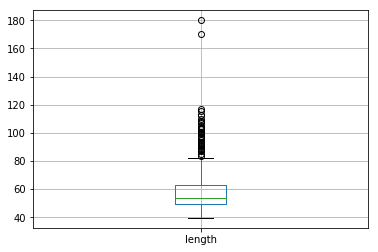

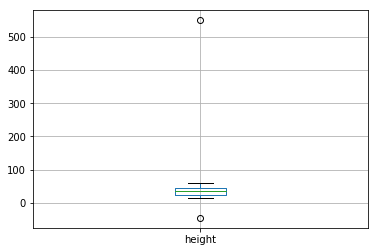

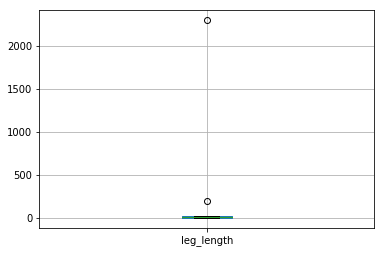

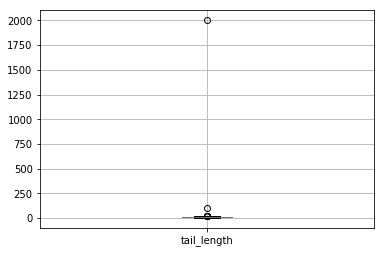

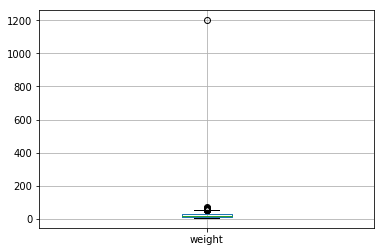

In [6]:
# Creating box plots for numerical data
for column in doggy_data.select_dtypes(include='float').columns.tolist():
    plt.figure()
    doggy_data.boxplot([column])

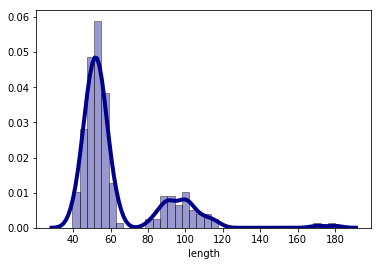

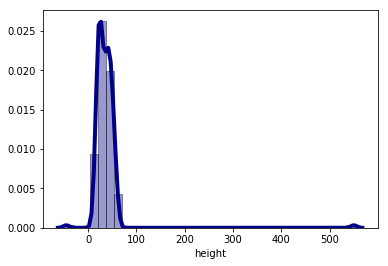

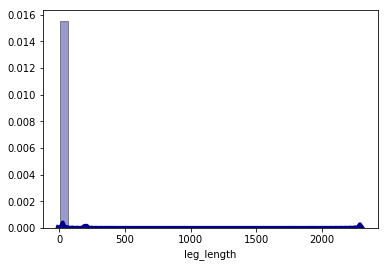

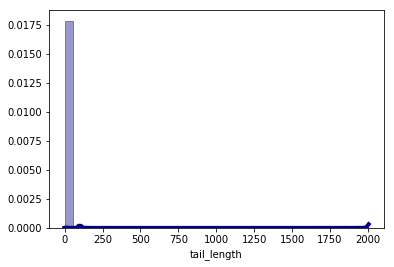

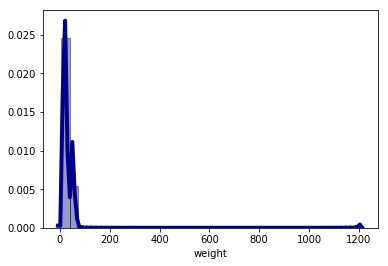

In [7]:
# Creating histogram and density plots for numerical data
for column in doggy_data.select_dtypes(include='float').columns.tolist():
    plt.figure()
    sns.distplot(doggy_data[column], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

##### Checking the weight data points that aren't possible

In [8]:
doggy_data[doggy_data.weight > 155]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
14,14,Frank Hornby,1,0,True,180.0,550.0,200.0,100.0,1200.0,0,0,Beethoven,Frank Hornby is a giraffe


In [9]:
doggy_data[doggy_data.weight < .5]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes


##### Checking tail length data points that aren't possible

In [10]:
doggy_data[doggy_data.tail_length > 78]
# Haha it says Frank Hornby is a giraffe!!! Need to make sure not to use this row then

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
14,14,Frank Hornby,1,0,True,180.000000,550.00000,200.000000,100.0,1200.000000,0,0,Beethoven,Frank Hornby is a giraffe
133,133,David Hilbert,9,5,False,52.054492,21.56189,5.850638,2000.0,12.764691,1,0,Beethoven,NaN


In [11]:
doggy_data[doggy_data.tail_length < 0]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes


##### Checking leg length data points that aren't possible

In [12]:
doggy_data[doggy_data.leg_length > 27]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
14,14,Frank Hornby,1,0,True,180.000000,550.000000,200.000000,100.000000,1200.000000,0,0,Beethoven,Frank Hornby is a giraffe
68,68,Pliny the Elder,3,9,True,97.900357,50.766867,2295.152851,24.212034,49.318271,0,0,Beethoven,NaN


In [13]:
doggy_data[doggy_data.leg_length < 3]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
82,82,Wilhelm Wundt,6,8,True,43.571511,22.693076,2.827122,8.467112,7.347856,0,0,Beethoven,NaN
156,156,Dian Fossey,3,2,True,41.502484,18.843955,2.773595,8.921205,10.303561,0,0,Beethoven,NaN
187,187,Polly Matzinger,1,1,True,47.774033,18.685226,2.947762,9.738150,11.151887,0,1,Beethoven,NaN


##### Checking height data points that aren't possible

In [14]:
doggy_data[doggy_data.height > 111.8]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
14,14,Frank Hornby,1,0,True,180.0,550.0,200.0,100.0,1200.0,0,0,Beethoven,Frank Hornby is a giraffe


In [15]:
doggy_data[doggy_data.height < 9.65]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
126,126,Ada Lovelace,7,3,True,54.670222,-45.147872,23.966309,13.080918,19.788443,0,0,Beethoven,NaN


##### Checking length data points that aren't possible

In [16]:
doggy_data[doggy_data.length > 150]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
14,14,Frank Hornby,1,0,True,180.000000,550.000000,200.000000,100.000000,1200.000000,0,0,Beethoven,Frank Hornby is a giraffe
151,151,Srinivasa Ramanujan,3,0,True,170.483037,34.294323,19.060358,16.038163,46.876142,0,0,Beethoven,NaN


In [17]:
doggy_data[doggy_data.length < 8.5]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes


### Observations 
- Definitely an error recording the data there is no possible way to have a 2000 cm tail.(Yikes!!!! 65 foot tail 😲)
- Frank Hornby is a giraffe not a dog!!! 😲


### Getting rid of the outlier data and checking distribution again

In [18]:
# Cleaning the dataset
doggy_data = doggy_data[(doggy_data.weight <= 155) & (doggy_data.weight >= .5)]
doggy_data = doggy_data[(doggy_data.tail_length <= 78) & (doggy_data.tail_length >= 0)]
doggy_data = doggy_data[(doggy_data.leg_length <= 27) & (doggy_data.leg_length >= 3)]
doggy_data = doggy_data[(doggy_data.height <= 111.8) & (doggy_data.height >= 9.65)]
doggy_data = doggy_data[(doggy_data.length <= 150) & (doggy_data.length >= 8.5)]

- We end up getting rid of 8 data points

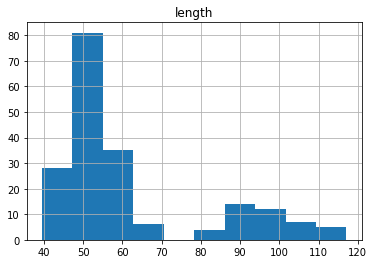

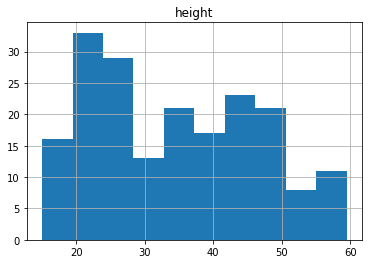

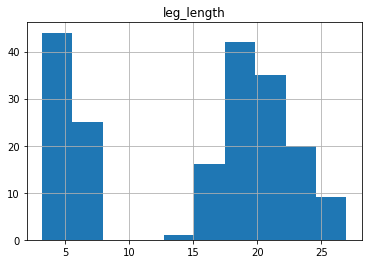

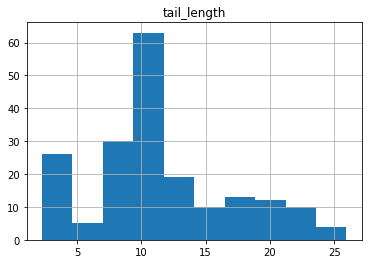

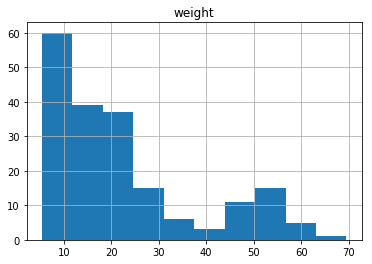

In [19]:
# Creating histograms for numerical data after data set has been cleaned to a certain extent
for column in doggy_data.select_dtypes(include='float').columns.tolist():
    plt.figure()
    doggy_data.hist([column])

### Observations
- The data includes a lot of dogs who weigh in on the lower end.
- Interestingly there aren't any dogs who have a length in between 70 cm to 82 cm. 
- Overall the dataset seems to be skewed more to the right with a majority of the data representing the lower end.

### Checking the notes column

In [20]:
# Loading the data with only data points that have notes
doggy_data[doggy_data.notes.notnull()]

,order_seen,name,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary,one_direction_or_beethoven,notes
1,1,Hermann Rorschach,1,0,True,90.782174,50.869246,19.315325,19.270638,48.248392,0,0,Beethoven,"Strange, mesmeric markings"
13,13,Bernardo Houssay,6,0,False,52.932418,41.802584,25.014228,11.313890,17.111295,0,0,One Direction,This dog was unconscious
44,44,Leland Clark,1,7,True,44.603271,15.276438,3.389800,8.355893,8.764983,0,0,Beethoven,Starting to think this experiment is flawed
48,48,Sigmund Freud,1,3,True,49.001402,25.638050,4.278318,9.916187,10.656061,0,0,Beethoven,Bit his father on the way in
74,74,Michael Faraday,7,10,True,54.964761,37.088163,16.802679,2.742588,22.082437,0,0,One Direction,Passed out
75,75,Lise Meitner,15,12,False,48.884595,23.086980,6.308661,8.990304,9.414882,0,0,Beethoven,Same as last time
105,105,Johannes Kepler,4,4,True,49.150758,25.806126,4.187190,9.399658,13.931913,1,0,One Direction,Too sick to eat
106,106,Gregor Mendel,1,4,True,48.248429,36.198230,17.608247,13.393498,26.050855,0,0,Beethoven,"No, I am convinced that I am right, dogs do pr..."
119,119,Henri Poincaré,9,0,True,63.712387,48.824309,22.648822,14.865327,27.366709,0,0,Beethoven,Potentially brain damaged - jumped on my table...
173,173,Ivan Pavlov,3,0,True,46.387591,18.317677,5.720620,21.992008,9.371817,1,1,Beethoven,Unusually slobbery


In [21]:
doggy_data.one_direction_or_beethoven.value_counts()

Beethoven        189
One Direction      3
Name: one_direction_or_beethoven, dtype: int64

In [22]:
doggy_data[doggy_data.notes.notnull()]['notes'][106]

'No, I am convinced that I am right, dogs do prefer Beethoven. I leave a biscuit on the floor and tell the dog to eat it only if they prefer Beethoven, and they all do (with explainable exceptions)'

### Observations

- Wow all three times One Direction was played notes were written down.
- In 2/3 instances One Direction was played the dog passed out interestingly enough.
- The note associated with the dog named Gregor Mendel (106) seems to be interesting considering 189/192 instances Beethoven has been played and only 3 instances of One Direction which doesn't seem to be a fair split to make that judgement.
- The notes have a negative sentiment.
- One of the notes mentions a flawed experiment. (I'm assuming it was the Beethoven vs. One Direction choice)

### Checking the Age Distribution

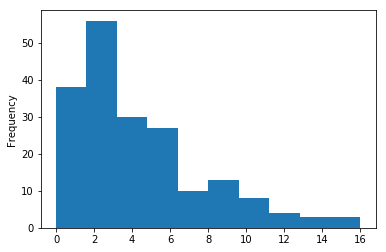

In [23]:
doggy_data['age'].plot(kind='hist')

### Question to think about

- From online research typically smaller dogs live longer so for the ages 12 and above I wonder whether we can tell if they are on the smaller side?

In [24]:
# Subsetting the data on older age
doggy_age = doggy_data[doggy_data.age >= 12]

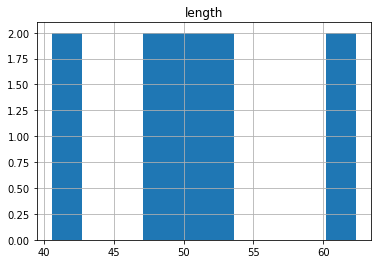

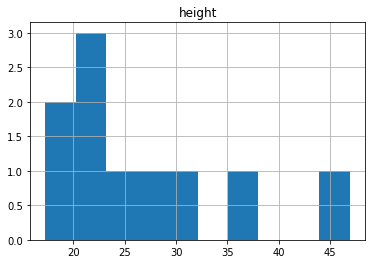

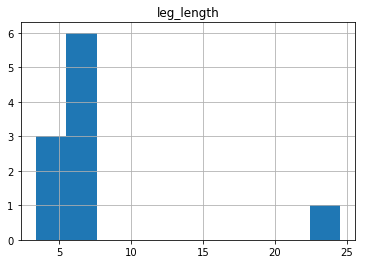

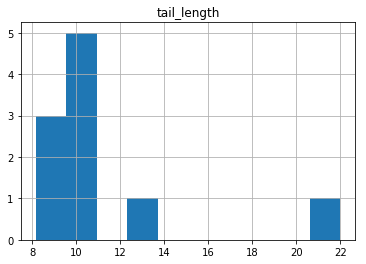

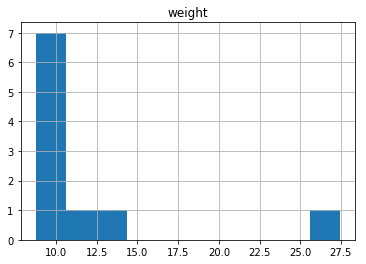

In [25]:
# Creating histogram for the numerical data with age >= 12
for column in doggy_age.select_dtypes(include='float').columns.tolist():
    plt.figure()
    doggy_age.hist([column])

### Observations

- For my previous question it seems to be the case for older ages the dogs tend to be smaller. (shown by the weight and height distributions)

### Checking out common names

In [26]:
# Splitting the name column to get first name
doggy_data['first_name'] = [x.split()[0] for x in doggy_data.name]
popular_names = doggy_data.first_name.value_counts()
popular_names

William        7
John           6
Alfred         4
James          4
Henry          4
Alexander      4
Benjamin       3
Maria          3
Joseph         3
J.             3
Thomas         3
Robert         3
Max            3
Carl           3
Charles        3
Ibn            2
Hans           2
Hermann        2
Michael        2
Mary           2
Willard        2
Maurice        2
Pyotr          1
Justus         1
Lucretius      1
Galileo        1
B.             1
Alan           1
Chen-Ning      1
Emil           1
              ..
Macfarlane     1
Mario          1
Kristian       1
Pierre         1
Evangelista    1
Albert         1
Santiago       1
Glenn          1
Anaximander    1
George         1
Alhazen        1
Ernest         1
Democritus     1
René           1
Arthur         1
Gregor         1
Wolfgang       1
Friedrich      1
Tim            1
Ivan           1
Anders         1
Walter         1
Carolus        1
Richard        1
Gottlieb       1
Ramon          1
Katharine      1
Grace         

In [27]:
# Getting the sum of the names that popped up more than once
popular_names[popular_names > 1].sum()

70

In [28]:
# Dropping the column I added in this section
doggy_data = doggy_data.drop('first_name',axis=1)

### Observations
- Most common first names seem to be boy first names (Maria seems to be the first and that is 11th on the list).
- 70/192 first names appear more than once in the dataset with boy names comprising a large majority of those.

### Checking the correlation between the variables

In [29]:
# Checking correlation to see relationships between variables
doggy_data.corr()

,order_seen,age,num_barks,waggy_tail,length,height,leg_length,tail_length,weight,long_haired,scary
order_seen,1.000000,0.052993,-0.228644,-0.124826,-0.133720,-0.179926,-0.138288,-0.159653,-0.158081,0.009646,0.026687
age,0.052993,1.000000,0.083336,-0.510624,-0.179285,-0.245521,-0.269757,-0.058601,-0.211779,-0.097839,0.039124
num_barks,-0.228644,0.083336,1.000000,-0.100512,0.036445,0.031305,0.021169,0.029810,0.051422,0.034115,0.173036
waggy_tail,-0.124826,-0.510624,-0.100512,1.000000,0.060466,0.099706,0.131329,0.023652,0.083941,0.026557,0.059618
length,-0.133720,-0.179285,0.036445,0.060466,1.000000,0.664520,0.399197,0.747724,0.900426,0.068432,0.101818
height,-0.179926,-0.245521,0.031305,0.099706,0.664520,1.000000,0.793318,0.555746,0.741722,-0.166419,0.105538
leg_length,-0.138288,-0.269757,0.021169,0.131329,0.399197,0.793318,1.000000,0.167018,0.528289,-0.292013,0.057351
tail_length,-0.159653,-0.058601,0.029810,0.023652,0.747724,0.555746,0.167018,1.000000,0.713289,0.130837,0.124066
weight,-0.158081,-0.211779,0.051422,0.083941,0.900426,0.741722,0.528289,0.713289,1.000000,-0.001678,0.098793
long_haired,0.009646,-0.097839,0.034115,0.026557,0.068432,-0.166419,-0.292013,0.130837,-0.001678,1.000000,0.017357


### Observations

- age and waggy_tail seems to have a negative correlation (-.5144)
- height and weight have a really high positive correlation (.96687)
- length and height seem to have a somewhat positive correlation (.52709)
- length and weight seem to have a somewhat positive correlation (.509267)
- tail length and leg_length seem to have no correlation at all (.00078)

### Prepping data and Finding how many Breeds

In [30]:
# Binning age
age_min = doggy_data.age.min()
age_max = doggy_data.age.max()

bins_age = np.linspace(age_min,age_max,4)
age_label = ['young','middle_age','old']

doggy_data['age_binned'] = pd.cut(doggy_data['age'], bins=bins_age, labels=age_label, include_lowest=True)

In [31]:
# Binning barks
barks_min = doggy_data.age.min()
barks_max = doggy_data.age.max()

bins_barks = np.linspace(barks_min,barks_max,4)
barks_label = ['none_to_few_barks','decent_amount_barks','many_barks']

doggy_data['barks_binned'] = pd.cut(doggy_data['num_barks'], bins=bins_barks, labels=barks_label, include_lowest=True)

In [32]:
# Dropping some columns 
doggy_data = doggy_data.drop(['order_seen','age','name','num_barks','notes'],axis=1)
doggy_data['waggy_tail'] = doggy_data['waggy_tail'].astype(int) 

In [33]:
# Transforming categorical columns
doggy_data = pd.get_dummies(doggy_data, columns=['age_binned','barks_binned'],prefix='binned')
doggy_data['one_direction_or_beethoven'] = doggy_data['one_direction_or_beethoven'].astype('category').cat.codes

In [34]:
# Scaling the data
doggy_scaled = MinMaxScaler().fit_transform(doggy_data)

In [35]:
km_scores= []
km_silhouette = []
for i in range(2,70):
    km = KMeans(n_clusters=i, random_state=0).fit(doggy_scaled)
    preds = km.predict(doggy_scaled)
    
    km_scores.append(-km.score(doggy_scaled))
    
    silhouette = silhouette_score(doggy_scaled,preds)
    km_silhouette.append(silhouette)

#### Using the Elbow Method from KMeans to determine K

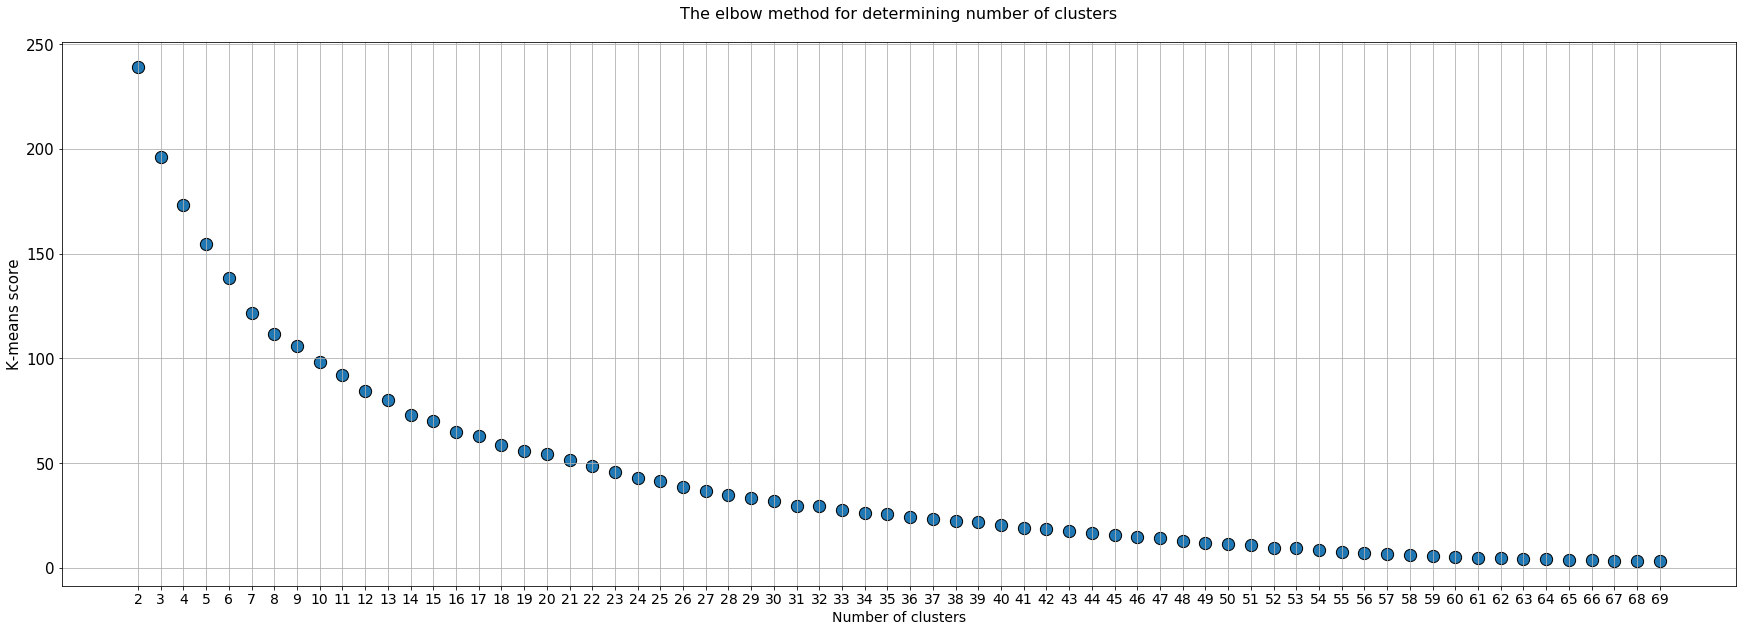

In [36]:
plt.figure(figsize=(30,10))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,70)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,70)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

#### Using the Silhouette Coefficient Method from KMeans to determine K

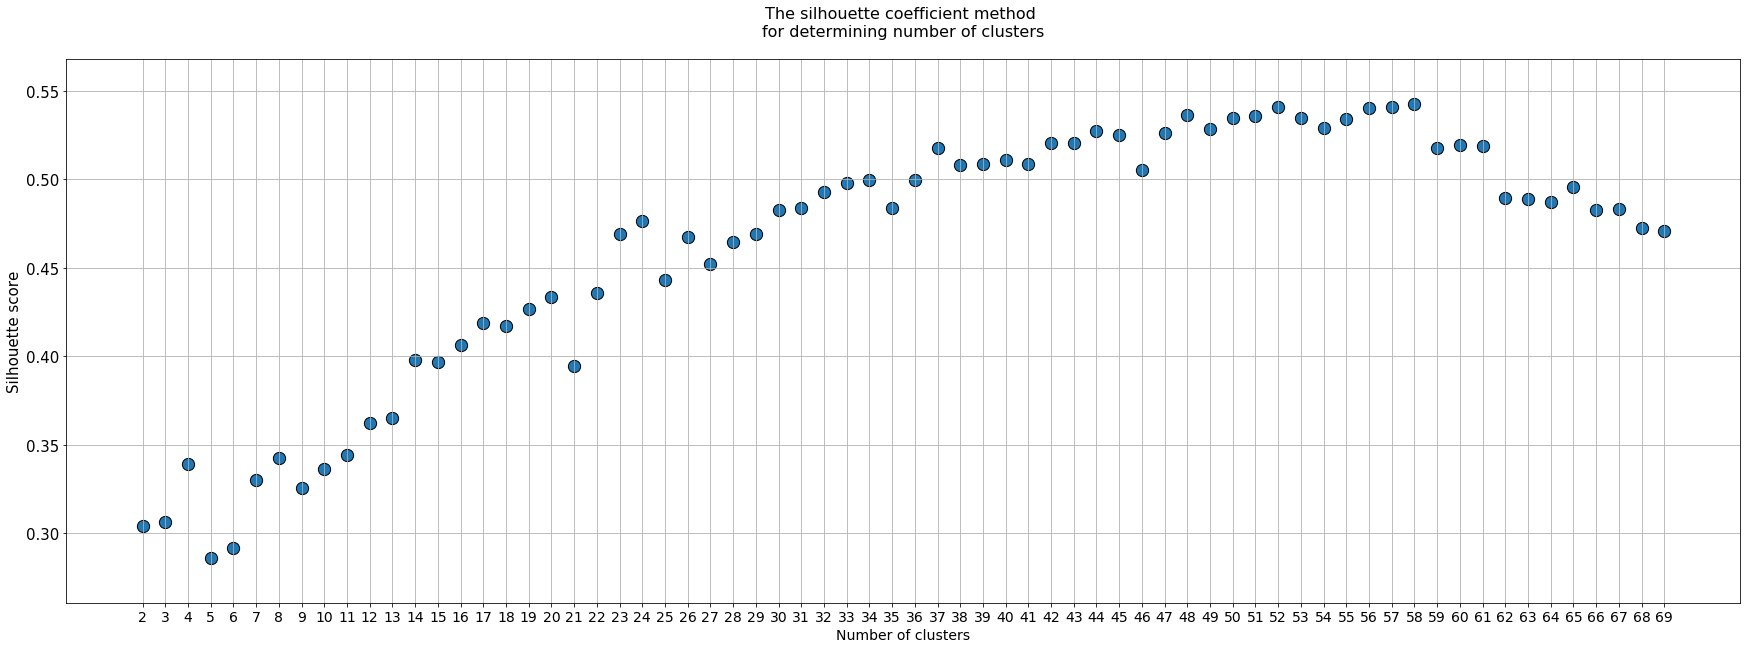

In [37]:
plt.figure(figsize=(30,10))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,70)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,70)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

## Observations
- Hard to tell how many clusters there are with the Elbow Method as there is no elbow shape
- Using the silhoutte method it seems that k=58 as that's where the score tops out

- Would definitely have to perform better feature engineering and scaling to see if k changes because k=58 (or 58 breeds of dogs) seems pretty astonishing.

# Final Notes

- I would do a lot more data analysis to see if there are more relationships I could find.
- I would also take time to perform better feature engineering as well. 
- I spent quite a bit of time actually researching data related to dogs so I could get rid of excess data that was not possible
